In [1]:
import numpy           as np
import gym
import Portfolio_Gym
from A2C_tf        import Actor_Critic, Critic_Network
import Factors_Wrapper as Wrapper
# Base Env speed: 20 iterattions/sec
# Agent Env speed: 5 iterrations/sec

# Single Asset Merton Model

C:\Users\Hli\Anaconda3\lib\site-packages\gym\envs\registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
  0%|          | 0/2000000 [00:00<?, ?it/s]c:\users\hli\documents\github\rl-portfolio\gym environments\portfolio_management\Portfolio_Gym\envs\Simulated.py:223: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  self._Factor_Model_Returns = np.random.multivariate_normal(Mu_, self.Asset_Factor_Cov)
  1%|          | 19951/2000000 [00:32<53:10, 620.53it/s] C:\Users\Hli\Documents\GitHub\rl-portfolio\A2C Agent\Factors_Wrapper.py:99: RuntimeWarning: divide by zero encountered in double_scalars
  self.Plot_Data['R_Squared'].append(1 - (np.sum((Y - Y_hat) ** 2) / np.sum((Y - np.mean(Y)) ** 2)))
100%|██████████| 2000000/2000000 [52:43<00:00, 632.31it/s] 


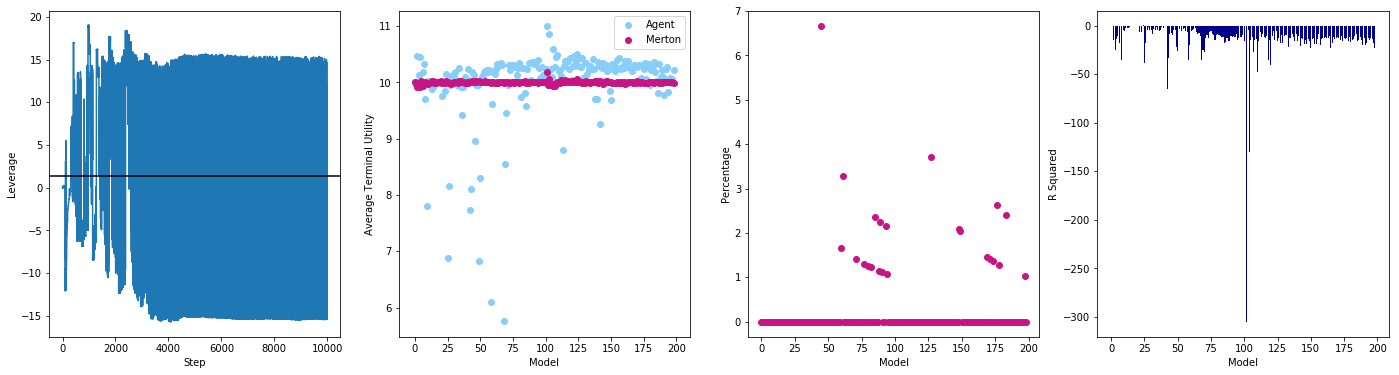

In [3]:
# Model Parameters.
Gamma  = 1
N_Episodes  = 2000000

Actor_Hypers   = {"Learning Rate" : 0.01,
                  "Epoch"         : 1,
                  'AC_Batches'    : 20,
                  "Network Size"  : [4,4],
                  "Activation"    : "Sigmoid",
                  "Alpha"         : 0.0}

Critic_Hypers = {"Learning Rate" : 0.01,
                 "Epoch"         : 1,
                 "Network Size"  : [4, 4],
                 "Alpha"         : 0.0}

# Critic_Hypers = {'power' : 3}
# Function to facilitate mulitprocessing.
Merton_Env = gym.make('Simulated-v0')
Merton_Env.Set_Params(Mu = 0.01, Sigma = 0.11, Row = 1, Rf = 0.0052,
                      Max_Leverage  = 750,
                      Min_Leverage  = -750,
                      Time_Horizon  = 1/10,
                      Time_Step     = 1/10,
                      Risk_Aversion = 0.9,
                      State_Corrolations = [1, 1])

myAC = Actor_Critic(Merton_Env, Actor_Hypers, Critic_Hypers, Gamma = Gamma, 
                        Sigma_Range = [1, 0.01], Sigma_Anneal = 0.5, Retrain_Frequency = 100)

myWrapper = Wrapper.Factors_Wrapper(myAC)
myWrapper.Train(N_Episodes, Plot = ['Mu', 'R_Squared', 'Merton_Benchmark', 'Percent_Merton_Action'])


In [ ]:
myWrapper.Diagnos_Charts(show='Critic', factor=4)

C:\Users\Hli\Anaconda3\lib\site-packages\gym\envs\registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
  0%|          | 0/2000000 [00:00<?, ?it/s]c:\users\hli\documents\github\rl-portfolio\gym environments\portfolio_management\Portfolio_Gym\envs\Simulated.py:223: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  self._Factor_Model_Returns = np.random.multivariate_normal(Mu_, self.Asset_Factor_Cov)
  1%|          | 19966/2000000 [00:36<1:11:13, 463.30it/s]C:\Users\Hli\Documents\GitHub\rl-portfolio\A2C Agent\Factors_Wrapper.py:99: RuntimeWarning: divide by zero encountered in double_scalars
  self.Plot_Data['R_Squared'].append(1 - (np.sum((Y - Y_hat) ** 2) / np.sum((Y - np.mean(Y)) ** 2)))
  2%|▏         | 40025/2000000 [01:08<52:38, 620.59it/s]  C:\Users\Hli\Documents\GitHub\rl-portfolio\A2C Agent\A2C_tf.py:128: RuntimeWarning: invalid value encountered in log


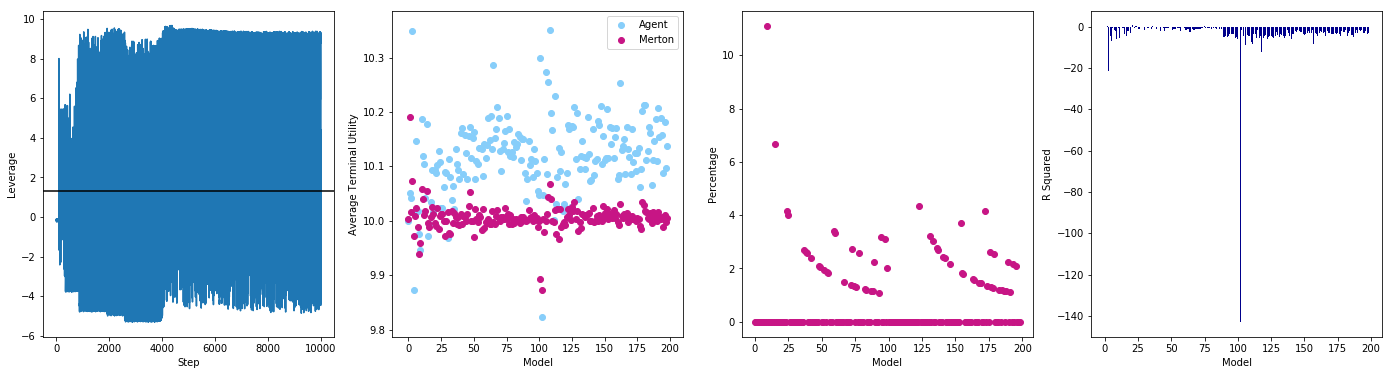

In [2]:
# Model Parameters.
Gamma  = 1
N_Episodes  = 2000000

Actor_Hypers   = {"Learning Rate" : 0.01,
                  "Epoch"         : 1,
                  'AC_Batches'    : 20,
                  "Network Size"  : [4,4],
                  "Activation"    : "Sigmoid",
                  "Alpha"         : 0.0}

Critic_Hypers = {"Learning Rate" : 0.01,
                 "Epoch"         : 1,
                 "Network Size"  : [4, 4],
                 "Alpha"         : 0.0}

# Critic_Hypers = {'power' : 3}
# Function to facilitate mulitprocessing.
Merton_Env = gym.make('Simulated-v0')
Merton_Env.Set_Params(Mu = 0.01, Sigma = 0.11, Row = 1, Rf = 0.0052,
                      Max_Leverage  = 750,
                      Min_Leverage  = -750,
                      Time_Horizon  = 1/10,
                      Time_Step     = 1/10,
                      Risk_Aversion = 0.9,
                      State_Corrolations = [1, 1])

myAC = Actor_Critic(Merton_Env, Actor_Hypers, Critic_Hypers, Gamma = Gamma, Sigma_Range = [1, 0.01], 
                    Sigma_Anneal = 0.5, Retrain_Frequency = 100, Backprop= 'log')

myWrapper = Wrapper.Factors_Wrapper(myAC)
myWrapper.Train(N_Episodes, Plot = ['Mu', 'R_Squared', 'Merton_Benchmark', 'Percent_Merton_Action'])


In [ ]:
F3 = [item['s0'][2] for [item] in myAC.Exp]
F4 = [item['s0'][3] for [item] in myAC.Exp]
r = [item['r'] for [item] in myAC.Exp]

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=F3, y=r)

In [ ]:
plt.scatter(x=F4, y=r)

In [ ]:
myAC.Exp[0]

In [ ]:
idx = np.random.choice(len(myAC.Exp), int(len(myAC.Exp)*0.7), replace = False)
test_idx = np.setdiff1d(np.arange(len(myAC.Exp)), idx)
Train = np.array(myAC.Exp)[idx]
Test = np.array(myAC.Exp)[test_idx]

In [ ]:
Network = Critic_Network([32,16], 4, 0)

In [ ]:
Train_X = np.array([items['s0'] for [items] in Train])
Train_Y = np.array([items['r'] for [items] in Train])
Test_X = np.array([items['s0'] for [items] in Test])
Test_Y = np.array([items['r'] for [items] in Test])

In [ ]:
import tensorflow as tf
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10000):
        sess.run(Network.fit, feed_dict = {Network.X: Train_X, Network.V_in : Train_Y, Network.learning_rate: 0.01})
    Pred = sess.run(Network.Value_Pred, feed_dict = {Network.X : Test_X})

In [ ]:
plt.plot(Pred, Test_Y)